<a href="https://www.kaggle.com/code/surobhipal/netflix-movies-and-tv-shows-exploratory-analysis?scriptVersionId=150032545" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-ultimate-netflix-tv-shows-and-movies-dataset/Best Movies Netflix.csv
/kaggle/input/the-ultimate-netflix-tv-shows-and-movies-dataset/raw_credits.csv
/kaggle/input/the-ultimate-netflix-tv-shows-and-movies-dataset/raw_titles.csv
/kaggle/input/the-ultimate-netflix-tv-shows-and-movies-dataset/Best Movie by Year Netflix.csv
/kaggle/input/the-ultimate-netflix-tv-shows-and-movies-dataset/Best Show by Year Netflix.csv
/kaggle/input/the-ultimate-netflix-tv-shows-and-movies-dataset/Best Shows Netflix.csv


# 1. Importing and Understanding the Dataset

**Dataset** - the-ultimate-netflix-tv-shows-and-movies-dataset



This dataset contains information on all of the movies and TV shows available on Netflix as of May 2022. 
In addition to basic information such as title, release year,the dataset includes data on the cast and crew, IMDB score and number of votes, genres, country of production companies, and more. With this data, we can analyze numerous factors based upon our own criteria.


Two datasets choosen for Analysis over here are :

1. **Best Movie by Netflix.csv**

Column name	Description
* **TITLE**         - The title of the movie or TV show. (String)
* **RELEASE_YEAR**	 - The year the movie or TV show was released. (Integer)
* **SCORE**	         - The IMDB score for the movie or TV show. (Float)
* **NUMBER_OF_VOTES**	 - The number of votes the movie or TV show has received on IMDB. (Integer)
* **DURATION**	     - The duration of the movie or TV show in minutes. (Integer)
* **MAIN_GENRE**	     - The main genre of the movie or TV show. (String)
* **MAIN_PRODUCTION**	 - The main production company of the movie or TV show. (String)

2. **Best Show by Netflix.csv**

Column name	Description
* **TITLE**	           -The title of the movie or TV show. (String)
* **RELEASE_YEAR**	   -The year the movie or TV show was released. (Integer)
* **SCORE**	           -The IMDB score for the movie or TV show. (Float)
* **NUMBER_OF_VOTES**	   -The number of votes the movie or TV show has received on IMDB. (Integer)
* **DURATION**	       -The duration of the movie or TV show in minutes. (Integer)
* **NUMBER_OF_SEASONS**  -The number of seasons the TV show has. (Integer)
* **MAIN_GENRE**	       -The main genre of the movie or TV show. (String)
* **MAIN_PRODUCTION**	   -The country of main production company of the movie or TV show. (String)
 

**Acknowledgement:**

* This Dataset is created by Eduardo Gonzalez
* [Click on thdata.world](https://data.world/gonzandrobles)

In [2]:
df1 = pd.read_csv("/kaggle/input/the-ultimate-netflix-tv-shows-and-movies-dataset/Best Movies Netflix.csv")
df1

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION
0,0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,documentary,GB
1,1,Inception,2010,8.8,2268288,148,scifi,GB
2,2,Forrest Gump,1994,8.8,1994599,142,drama,US
3,3,Anbe Sivam,2003,8.7,20595,160,comedy,IN
4,4,Bo Burnham: Inside,2021,8.7,44074,87,comedy,US
...,...,...,...,...,...,...,...,...
382,382,The Trip,2021,6.9,19706,113,comedy,NO
383,383,The Dirt,2019,6.9,47603,108,drama,US
384,384,Top Gun,1986,6.9,329656,110,drama,US
385,385,Radhe Shyam,2022,6.9,21328,138,romance,IN


Initial steps involve:
* Importing csv file by utilising pandas library and .read_csv() method
* The file will get converted into the Dataframe
* By deploying various methods and attributes, we can retrieve useful information about the dataset for better understanding

In [3]:
# Checking null values present and Datatype of each column 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            387 non-null    int64  
 1   TITLE            387 non-null    object 
 2   RELEASE_YEAR     387 non-null    int64  
 3   SCORE            387 non-null    float64
 4   NUMBER_OF_VOTES  387 non-null    int64  
 5   DURATION         387 non-null    int64  
 6   MAIN_GENRE       387 non-null    object 
 7   MAIN_PRODUCTION  387 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 24.3+ KB


No Column in the dataframe 1 contains null values

In [4]:
# Importing dataset 2 - Best Show by Year Netflix.csv
df2 = pd.read_csv("/kaggle/input/the-ultimate-netflix-tv-shows-and-movies-dataset/Best Shows Netflix.csv",index_col = "index")
df2

,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION
index,,,,,,,,
0,Breaking Bad,2008,9.5,1727694,48,5,drama,US
1,Avatar: The Last Airbender,2005,9.3,297336,24,3,scifi,US
2,Our Planet,2019,9.3,41386,50,1,documentary,GB
3,Kota Factory,2019,9.3,66985,42,2,drama,IN
4,The Last Dance,2020,9.1,108321,50,1,documentary,US
...,...,...,...,...,...,...,...,...
241,Evil Genius,2018,7.5,27516,48,1,crime,US
242,13 Reasons Why,2017,7.5,282373,58,4,drama,US
243,Lupin,2021,7.5,100575,46,3,crime,FR


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 245
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TITLE              246 non-null    object 
 1   RELEASE_YEAR       246 non-null    int64  
 2   SCORE              246 non-null    float64
 3   NUMBER_OF_VOTES    246 non-null    int64  
 4   DURATION           246 non-null    int64  
 5   NUMBER_OF_SEASONS  246 non-null    int64  
 6   MAIN_GENRE         246 non-null    object 
 7   MAIN_PRODUCTION    246 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 17.3+ KB


Dataframe df1 and df2 contains zero null values

# 2. Data Preparation and Cleaning

**In this step we will improve the quality of data by cleaning and transforming dataframes into more readable format.**

Following steps are going to be performed:

* Index sorting by deploying sort_index() method. It will provide an easy access to data
* Renaming of multiple columns using rename() method
* Evaluating the presence duplicate values in dataframes
* Creating and assigning values to columns
* Converting row values of column into titlecase by using .str.title() and .apply() methods

In [6]:
# Sorting index 
df1.sort_index()

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION
0,0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,documentary,GB
1,1,Inception,2010,8.8,2268288,148,scifi,GB
2,2,Forrest Gump,1994,8.8,1994599,142,drama,US
3,3,Anbe Sivam,2003,8.7,20595,160,comedy,IN
4,4,Bo Burnham: Inside,2021,8.7,44074,87,comedy,US
...,...,...,...,...,...,...,...,...
382,382,The Trip,2021,6.9,19706,113,comedy,NO
383,383,The Dirt,2019,6.9,47603,108,drama,US
384,384,Top Gun,1986,6.9,329656,110,drama,US
385,385,Radhe Shyam,2022,6.9,21328,138,romance,IN


In [7]:
df2.sort_index()

,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION
index,,,,,,,,
0,Breaking Bad,2008,9.5,1727694,48,5,drama,US
1,Avatar: The Last Airbender,2005,9.3,297336,24,3,scifi,US
2,Our Planet,2019,9.3,41386,50,1,documentary,GB
3,Kota Factory,2019,9.3,66985,42,2,drama,IN
4,The Last Dance,2020,9.1,108321,50,1,documentary,US
...,...,...,...,...,...,...,...,...
241,Evil Genius,2018,7.5,27516,48,1,crime,US
242,13 Reasons Why,2017,7.5,282373,58,4,drama,US
243,Lupin,2021,7.5,100575,46,3,crime,FR


In [8]:
# Renaming column SCORE to IMDB_SCORE , NUMBER_OF_VOTES ,MAIN_GENRE and MAIN_PRODUCTION in both the Dataframes
df1.rename(columns={"SCORE":"IMDB_SCORE"},inplace = True)
df2.rename(columns={"SCORE":"IMDB_SCORE"},inplace = True)

df1.rename(columns ={"NUMBER_OF_VOTES":"TOTAL_VOTES"},inplace = True)
df2.rename(columns ={"NUMBER_OF_VOTES":"TOTAL_VOTES"},inplace = True)

df1.rename(columns ={"MAIN_GENRE":"GENRE"},inplace = True)
df2.rename(columns ={"MAIN_GENRE":"GENRE"},inplace = True)

df1.rename(columns ={"MAIN_PRODUCTION":"PRODUCTION_COUNTRY"},inplace = True)
df2.rename(columns ={"MAIN_PRODUCTION":"PRODUCTION_COUNTRY"},inplace = True)


In [9]:
# Checking duplicate values in datasets
df1[df1.duplicated()]

,index,TITLE,RELEASE_YEAR,IMDB_SCORE,TOTAL_VOTES,DURATION,GENRE,PRODUCTION_COUNTRY


In [10]:
df2[df2.duplicated()]

,TITLE,RELEASE_YEAR,IMDB_SCORE,TOTAL_VOTES,DURATION,NUMBER_OF_SEASONS,GENRE,PRODUCTION_COUNTRY
index,,,,,,,,


No duplicates present in both the datasets

In [11]:
# Creating new column RANKING by deploying .rank() method on the basis of IMDB_SCORE
df1["RANKING"] = df1["IMDB_SCORE"].rank(ascending = False,method = "first")
df2["RANKING"] = df2["IMDB_SCORE"].rank(ascending = False,method = "first")


In [12]:
# Creating new column CATEGORY and Assigning values Movie and TV show for df1 and df2 respectively
df1["CATEGORY"] = "Movie"
df2["CATEGORY"] = "TV Show"


In [13]:
# Converting row values of GENRE into titlecase, two ways to do the same.

df1["GENRE"] = df1["GENRE"].str.title()
df2["GENRE"] = df2["GENRE"].apply(str.title)

In [14]:
df1

,index,TITLE,RELEASE_YEAR,IMDB_SCORE,TOTAL_VOTES,DURATION,GENRE,PRODUCTION_COUNTRY,RANKING,CATEGORY
0,0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,Documentary,GB,1.0,Movie
1,1,Inception,2010,8.8,2268288,148,Scifi,GB,2.0,Movie
2,2,Forrest Gump,1994,8.8,1994599,142,Drama,US,3.0,Movie
3,3,Anbe Sivam,2003,8.7,20595,160,Comedy,IN,4.0,Movie
4,4,Bo Burnham: Inside,2021,8.7,44074,87,Comedy,US,5.0,Movie
...,...,...,...,...,...,...,...,...,...,...
382,382,The Trip,2021,6.9,19706,113,Comedy,NO,383.0,Movie
383,383,The Dirt,2019,6.9,47603,108,Drama,US,384.0,Movie
384,384,Top Gun,1986,6.9,329656,110,Drama,US,385.0,Movie
385,385,Radhe Shyam,2022,6.9,21328,138,Romance,IN,386.0,Movie


In [15]:
df2

,TITLE,RELEASE_YEAR,IMDB_SCORE,TOTAL_VOTES,DURATION,NUMBER_OF_SEASONS,GENRE,PRODUCTION_COUNTRY,RANKING,CATEGORY
index,,,,,,,,,,
0,Breaking Bad,2008,9.5,1727694,48,5,Drama,US,1.0,TV Show
1,Avatar: The Last Airbender,2005,9.3,297336,24,3,Scifi,US,2.0,TV Show
2,Our Planet,2019,9.3,41386,50,1,Documentary,GB,3.0,TV Show
3,Kota Factory,2019,9.3,66985,42,2,Drama,IN,4.0,TV Show
4,The Last Dance,2020,9.1,108321,50,1,Documentary,US,5.0,TV Show
...,...,...,...,...,...,...,...,...,...,...
241,Evil Genius,2018,7.5,27516,48,1,Crime,US,242.0,TV Show
242,13 Reasons Why,2017,7.5,282373,58,4,Drama,US,243.0,TV Show
243,Lupin,2021,7.5,100575,46,3,Crime,FR,244.0,TV Show


# 3. Typecasting

* Next staircase involves converting datatypes into other appropriate datatype  
* It ultimately elevates the performance and reduce the memory usage

df1.info() method reveals that :
* Total memory usage is 30.2 + KB and 2.1+ KB for df1 and df2 respectively
* "Ranking" Columns is of float Datatype
* We can convert float datatype into int dataype either by using astype() method or pd.to_numeric() method
* In astype() and pd.to_numeric() methods, we can handle missing values and errors by using errors parameter 
* Columns with fewer unique values can be converted to categorical datatype using astype() method    

In [16]:
# Converting to int datatype
df1["RANKING"] = df1["RANKING"].astype("int")

In [17]:
# Checking unique and number of unique values in quantitative columns

print("Number of unique values in GENRE is",df1["GENRE"].nunique())
print("Number of unique values in PRODUCTION_COUNTRY is",df1["PRODUCTION_COUNTRY"].nunique())
print("Number of unique values in CATEGORY is",df1["CATEGORY"].nunique())

Number of unique values in GENRE is 15
Number of unique values in PRODUCTION_COUNTRY is 35
Number of unique values in CATEGORY is 1


In [18]:
print("Number of unique values in GENRE is",df2["GENRE"].nunique())
print("Number of unique values in PRODUCTION_COUNTRY is",df2["PRODUCTION_COUNTRY"].nunique())
print("Number of unique values in CATEGORY is",df2["CATEGORY"].nunique())

Number of unique values in GENRE is 12
Number of unique values in PRODUCTION_COUNTRY is 19
Number of unique values in CATEGORY is 1


In [19]:
# Converting to category datatype
df1["GENRE"] = df1["GENRE"].astype("category")
df1["PRODUCTION_COUNTRY"] = df1["PRODUCTION_COUNTRY"].astype("category")
df1["CATEGORY"] = df1["CATEGORY"].astype("category")

In [20]:
df2["GENRE"] = df2["GENRE"].astype("category")
df2["PRODUCTION_COUNTRY"] = df2["PRODUCTION_COUNTRY"].astype("category")
df2["CATEGORY"] = df2["CATEGORY"].astype("category")

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index               387 non-null    int64   
 1   TITLE               387 non-null    object  
 2   RELEASE_YEAR        387 non-null    int64   
 3   IMDB_SCORE          387 non-null    float64 
 4   TOTAL_VOTES         387 non-null    int64   
 5   DURATION            387 non-null    int64   
 6   GENRE               387 non-null    category
 7   PRODUCTION_COUNTRY  387 non-null    category
 8   RANKING             387 non-null    int64   
 9   CATEGORY            387 non-null    category
dtypes: category(3), float64(1), int64(5), object(1)
memory usage: 24.5+ KB


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 245
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   TITLE               246 non-null    object  
 1   RELEASE_YEAR        246 non-null    int64   
 2   IMDB_SCORE          246 non-null    float64 
 3   TOTAL_VOTES         246 non-null    int64   
 4   DURATION            246 non-null    int64   
 5   NUMBER_OF_SEASONS   246 non-null    int64   
 6   GENRE               246 non-null    category
 7   PRODUCTION_COUNTRY  246 non-null    category
 8   RANKING             246 non-null    float64 
 9   CATEGORY            246 non-null    category
dtypes: category(3), float64(2), int64(4), object(1)
memory usage: 17.3+ KB


Memory usage has considerably reduced both the dataframes after typecasting

# 4. Exploratory Analysis and Visualization

* Exploratory data analysis is a cornerstone for finding the hidden patterns and trends in a dataset
* It summarizes the main characteristics of dataset by deploying statistical analysis and visualization tools
* We will be leveraging the .describe() method and visualization libraries like matplotlib and seaborn over here
* .describe() will return the aggregated values of numeric columns 
* Visualisation libraries gives us the privilege to interact with the data by plotting variuos graphs

**1. Statistical Analysis**

In [23]:
# Deploying .describe() method and then transposing the rows and columns
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
index,387.0,193.000000,111.861522,0.0,96.5,193.0,289.5,386.0
RELEASE_YEAR,387.0,2011.023256,10.813874,1954.0,2008.0,2014.0,2018.0,2022.0
IMDB_SCORE,387.0,7.509044,0.441906,6.9,7.1,7.4,7.8,9.0
TOTAL_VOTES,387.0,136520.648579,234211.422353,10139.0,20512.5,45200.0,153485.5,2268288.0
DURATION,387.0,123.395349,28.371632,28.0,103.5,122.0,139.0,229.0
RANKING,387.0,194.000000,111.861522,1.0,97.5,194.0,290.5,387.0


In [24]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
RELEASE_YEAR,246.0,2014.760163,6.392869,1969.0,2013.00,2016.5,2019.00,2022.0
IMDB_SCORE,246.0,8.093496,0.449261,7.5,7.70,8.0,8.40,9.5
TOTAL_VOTES,246.0,101966.788618,168874.642248,10024.0,18553.25,41942.5,112811.75,1727694.0
DURATION,246.0,41.918699,15.242579,16.0,27.25,44.0,51.75,141.0
NUMBER_OF_SEASONS,246.0,3.650407,3.191785,1.0,1.00,3.0,5.00,21.0
RANKING,246.0,123.500000,71.158274,1.0,62.25,123.5,184.75,246.0


**Above statistical analsyis outlines vital information of dataset:**

* Netflix is streaming both old and latest released movies and TV Shows
* Oldest Movie was released in the Year 1954 whereas oldest TV show was released in the year 1969
* Latest Movie and TV show steaming on Netflix were both released in the Year 2022
* IMDB_SCORE ranges from 6.5 to 9.5 for both  Movies and TV shows 
* One particular movie has gained a skyscrapper votes of more than 20 lakhs
* One particular TV show made a splash with more than 17 lakhs votes
* Maximum time duration for a Movie and a TV show are 229 and 141 minutes respectively
* Particular TV show has released 21 season which depicts its huge acceptence across the world

**2. Visualization**

Visualization provides us liberty to find correlation between different columns of dataset in a comprehensive manner

Importing Matplotlib and Seaborn Libraries to visualise our data and to find correlations between different columns.

* Matplotlib plots various graphs using Pandas and Numpy.
* Seaborn is the extended version of Matplotlib, which uses Matplotlib, Numpy, and Pandas to plot graphs

In [25]:
# Importing matplotlib and seaborn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

**a. Exploring Relation between Release Year and Total Votes on the basis of Genre**

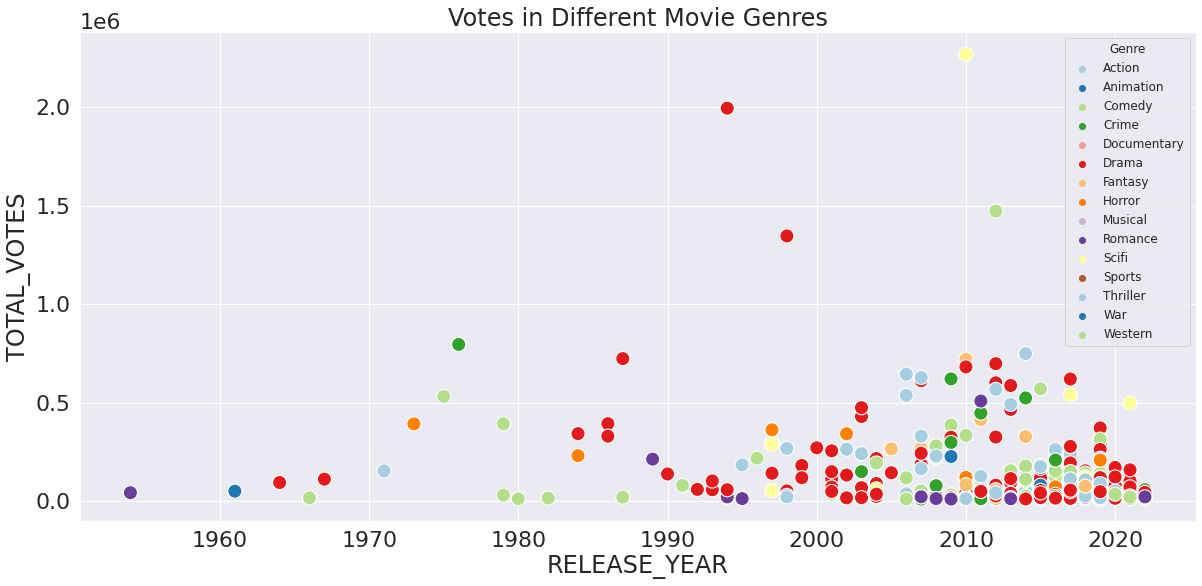

In [26]:
# Scatterplot
plt.figure(figsize=(20,9)) # Set plot dimensions
sns.set(font_scale = 2)
plt.title("Votes in Different Movie Genres")
sns.scatterplot(x =df1.RELEASE_YEAR,y = df1.TOTAL_VOTES,hue = df1.GENRE,palette="Paired",s = 200)
plt.legend(title ="Genre",fontsize = 12,title_fontsize =12)

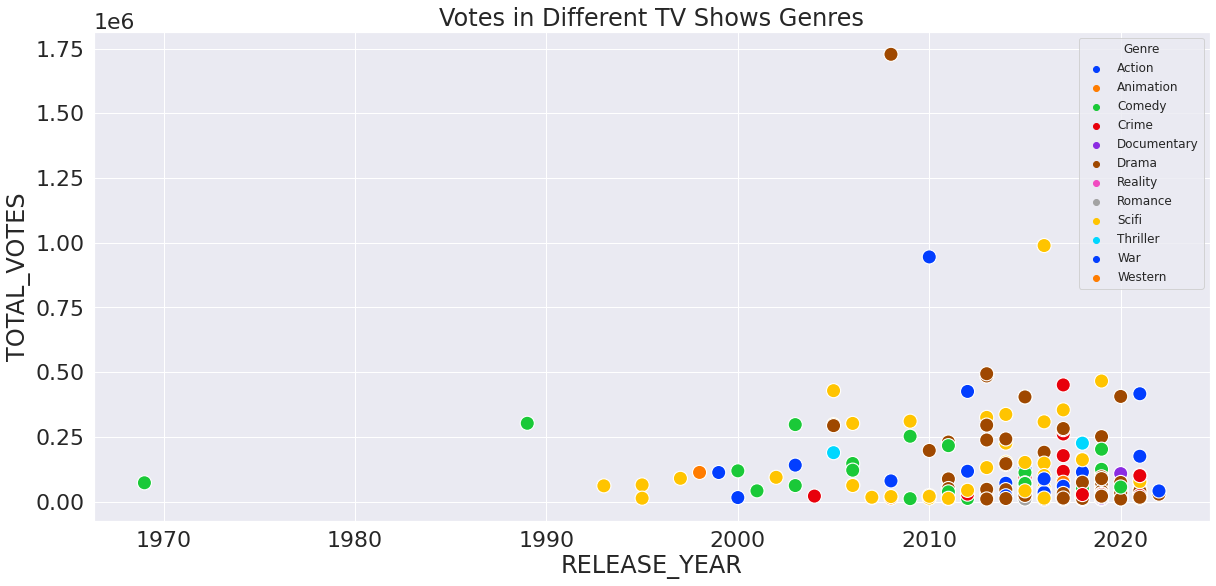

In [27]:
# Scatterplot
plt.figure(figsize=(20,9)) # Set plot dimensions
sns.set(font_scale = 2)
plt.title("Votes in Different TV Shows Genres")
sns.scatterplot(x =df2.RELEASE_YEAR,y = df2.TOTAL_VOTES,hue = df2.GENRE,palette="bright",s = 200)
plt.legend(title ="Genre",fontsize = 12,title_fontsize =12)

Scatter plots for Netflix Movies and TV shows summarises the presence of outliers
* A movie with a scifi Genre which was released in the Year 2020 has done extremely well by acquiring votes of more than 20 lakhs by users
* ANetflix Drama TV show received massive votes of around 17.5 lakhs

**b. Production of Movies and TV shows by Countries**

In [28]:
# Deploying .value_count() method to find out the number of production by each country
country_movies = df1.PRODUCTION_COUNTRY.value_counts(sort = True)
country_movies

US    157
IN    115
GB     29
DE      9
JP      9
FR      7
TR      7
ES      6
IT      4
KR      4
CA      4
CN      3
AU      3
IE      2
NZ      2
HK      2
HU      2
NO      2
UA      2
BE      2
NL      2
TH      1
XX      1
PS      1
PL      1
AR      1
MX      1
MW      1
LT      1
KH      1
ID      1
DK      1
CD      1
BR      1
ZA      1
Name: PRODUCTION_COUNTRY, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


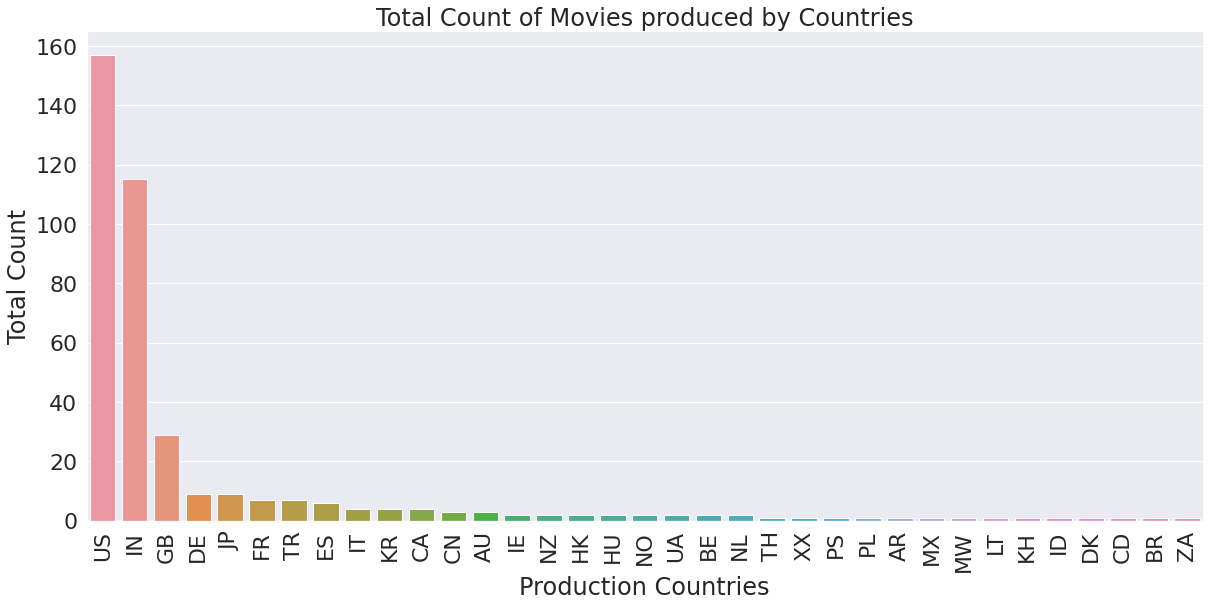

In [29]:
# Barplot
plt.figure(figsize =(20,9))
sns.set(font_scale = 2)
sns.barplot(country_movies.index,y = country_movies,order = country_movies.index)
plt.xlabel("Production Countries")
plt.ylabel("Total Count")
plt.title("Total Count of Movies produced by Countries")
plt.xticks(rotation = 90)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total Count of TV shows produced by Countries')

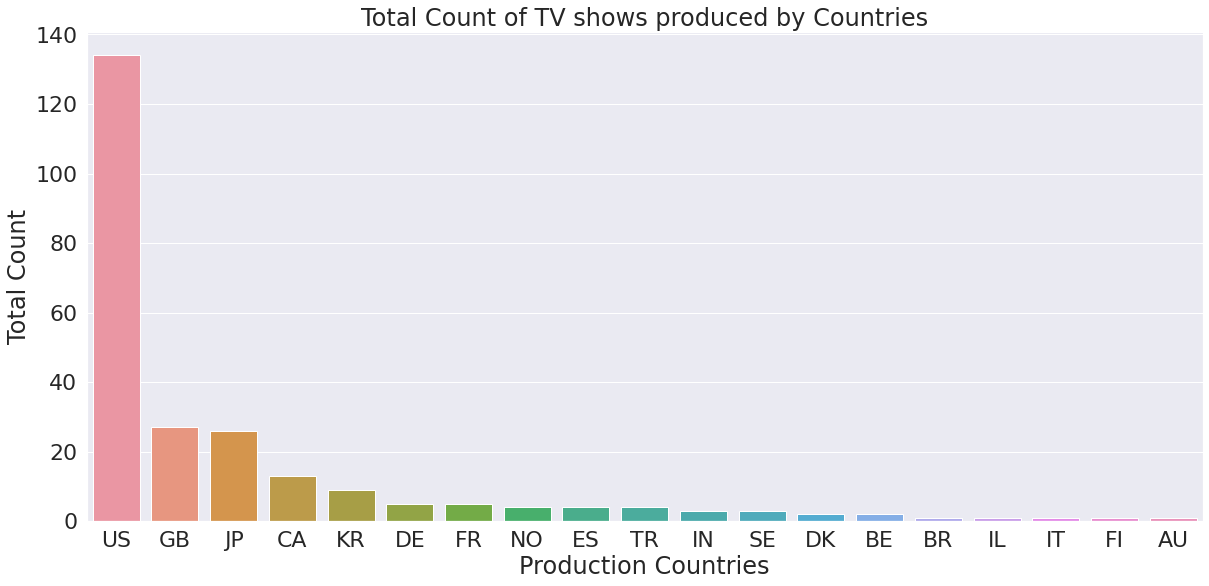

In [30]:
plt.figure(figsize =(20,9))
sns.set(font_scale = 2)
sns.barplot(df2.PRODUCTION_COUNTRY.value_counts(sort=True).index,y =df2.PRODUCTION_COUNTRY.value_counts(sort=True) ,order = df2.PRODUCTION_COUNTRY.value_counts(sort=True).index)
plt.xlabel("Production Countries")
plt.ylabel("Total Count")
plt.title("Total Count of TV shows produced by Countries")

**Barplots illustrates that:**

* Top Movies and TV shows are largely produced by United States
* India is the second contributor in producing top highly rated movies followed by Great Britain
* TV shows produced by Great Britain and Japan are almost same but are far behind than US
* US turned out to be the great player in an Entertainment Industry 

# 5. Asking and Answering Questions

**a. What are the  5 most and least voted genres of movies and TV shows of all time?**

In [31]:
#Grouping of genres will be done by .groupby () followed by .sum() method to find out the total number of votes in each genre
#.sort_values() is used to sort values in descending order

groupby_movies = df1.groupby("GENRE")["TOTAL_VOTES"].sum().sort_values(ascending= False)
groupby_movies

GENRE
Drama          21804564
Thriller        8398468
Comedy          4703792
Crime           3857710
Scifi           3832671
Western         2770109
Fantasy         2639958
Horror          1759154
Romance         1428590
Action           535189
Documentary      504297
Animation        341513
War              141682
Musical           94236
Sports            21558
Name: TOTAL_VOTES, dtype: int64

In [32]:
groupby_shows = df2.groupby("GENRE")["TOTAL_VOTES"].sum().sort_values(ascending= False)
groupby_shows

GENRE
Drama          8631747
Scifi          6262116
Action         3600930
Comedy         3298605
Crime          1822751
Thriller        447156
War             357639
Documentary     289732
Animation       187632
Western         147249
Reality          28171
Romance          10102
Name: TOTAL_VOTES, dtype: int64

**b. Find the total number of movies and TV shows streaming on Neflix which are released in the year 2020**

In [33]:
df1[df1["RELEASE_YEAR"] == 2022]

,index,TITLE,RELEASE_YEAR,IMDB_SCORE,TOTAL_VOTES,DURATION,GENRE,PRODUCTION_COUNTRY,RANKING,CATEGORY
58,58,Dasvi,2022,8.0,13140,125,Drama,IN,59,Movie
246,246,Badhaai Do,2022,7.3,15032,147,Comedy,IN,247,Movie
265,265,The Tinder Swindler,2022,7.2,57606,114,Crime,GB,266,Movie
325,325,Gangubai Kathiawadi,2022,7.0,44045,157,Drama,IN,326,Movie
385,385,Radhe Shyam,2022,6.9,21328,138,Romance,IN,386,Movie


In [34]:
df1[df1["RELEASE_YEAR"] == 2022].info() # Total 5 Movies

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 58 to 385
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index               5 non-null      int64   
 1   TITLE               5 non-null      object  
 2   RELEASE_YEAR        5 non-null      int64   
 3   IMDB_SCORE          5 non-null      float64 
 4   TOTAL_VOTES         5 non-null      int64   
 5   DURATION            5 non-null      int64   
 6   GENRE               5 non-null      category
 7   PRODUCTION_COUNTRY  5 non-null      category
 8   RANKING             5 non-null      int64   
 9   CATEGORY            5 non-null      category
dtypes: category(3), float64(1), int64(5), object(1)
memory usage: 2.4+ KB


In [35]:
df2[df2["RELEASE_YEAR"] == 2022]

,TITLE,RELEASE_YEAR,IMDB_SCORE,TOTAL_VOTES,DURATION,NUMBER_OF_SEASONS,GENRE,PRODUCTION_COUNTRY,RANKING,CATEGORY
index,,,,,,,,,,
11,Heartstopper,2022,8.9,28978,28,1,Drama,GB,12.0,TV Show
244,All of Us Are Dead,2022,7.5,41393,61,1,Action,KR,245.0,TV Show


In [36]:
df2[df2["RELEASE_YEAR"] == 2022].info() # Total 2 TV shows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 11 to 244
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   TITLE               2 non-null      object  
 1   RELEASE_YEAR        2 non-null      int64   
 2   IMDB_SCORE          2 non-null      float64 
 3   TOTAL_VOTES         2 non-null      int64   
 4   DURATION            2 non-null      int64   
 5   NUMBER_OF_SEASONS   2 non-null      int64   
 6   GENRE               2 non-null      category
 7   PRODUCTION_COUNTRY  2 non-null      category
 8   RANKING             2 non-null      float64 
 9   CATEGORY            2 non-null      category
dtypes: category(3), float64(2), int64(4), object(1)
memory usage: 1.3+ KB


**c. Which are the top 3 Movies with maximum  number of votes ?**

In [37]:
votes_movies = df1.sort_values("TOTAL_VOTES", ascending = False).head(3)
votes_movies

,index,TITLE,RELEASE_YEAR,IMDB_SCORE,TOTAL_VOTES,DURATION,GENRE,PRODUCTION_COUNTRY,RANKING,CATEGORY
1,1,Inception,2010,8.8,2268288,148,Scifi,GB,2,Movie
2,2,Forrest Gump,1994,8.8,1994599,142,Drama,US,3,Movie
6,6,Django Unchained,2012,8.4,1472668,165,Western,US,7,Movie


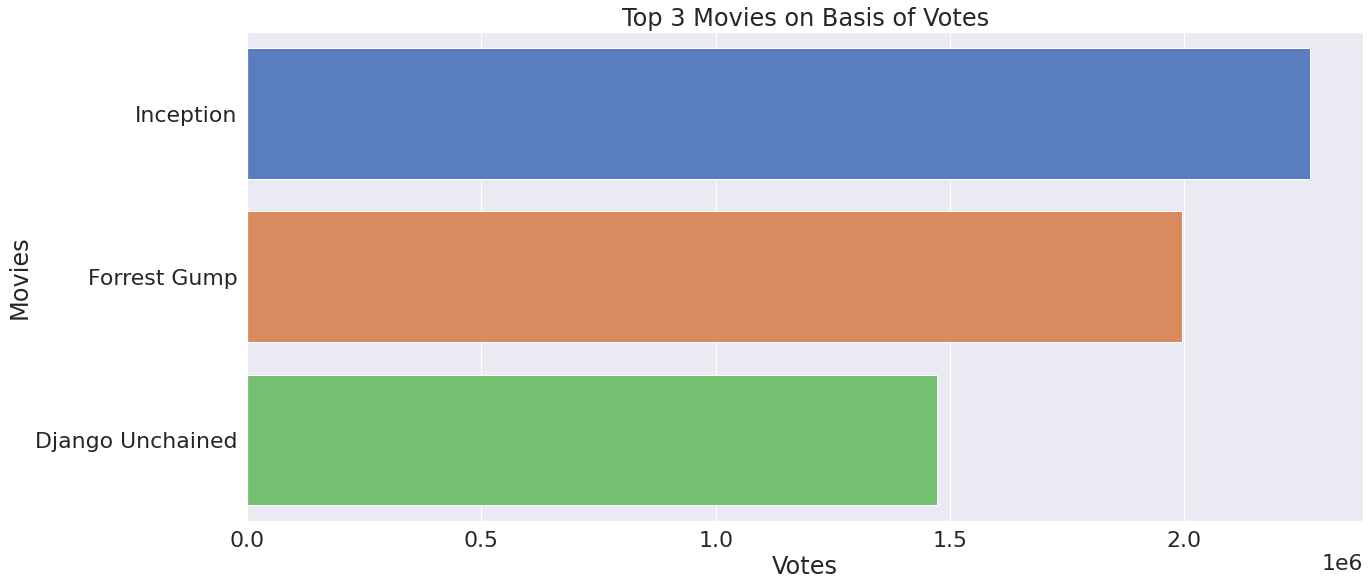

In [38]:
plt.figure(figsize=(20,9))
sns.set(font_scale = 2)
sns.barplot(x ="TOTAL_VOTES" , y ="TITLE", data = votes_movies,orient ='h',palette = "muted")
plt.title("Top 3 Movies on Basis of Votes")
plt.xlabel("Votes")
plt.ylabel("Movies")
plt.show()

**d. Which are the top 3 Movies with maximum  number of votes ?**

In [39]:
votes_shows = df2.sort_values("TOTAL_VOTES", ascending = False).head(3)
votes_shows

,TITLE,RELEASE_YEAR,IMDB_SCORE,TOTAL_VOTES,DURATION,NUMBER_OF_SEASONS,GENRE,PRODUCTION_COUNTRY,RANKING,CATEGORY
index,,,,,,,,,,
0,Breaking Bad,2008,9.5,1727694,48,5,Drama,US,1.0,TV Show
24,Stranger Things,2016,8.7,989090,52,5,Scifi,US,25.0,TV Show
102,The Walking Dead,2010,8.2,945125,46,11,Action,US,103.0,TV Show


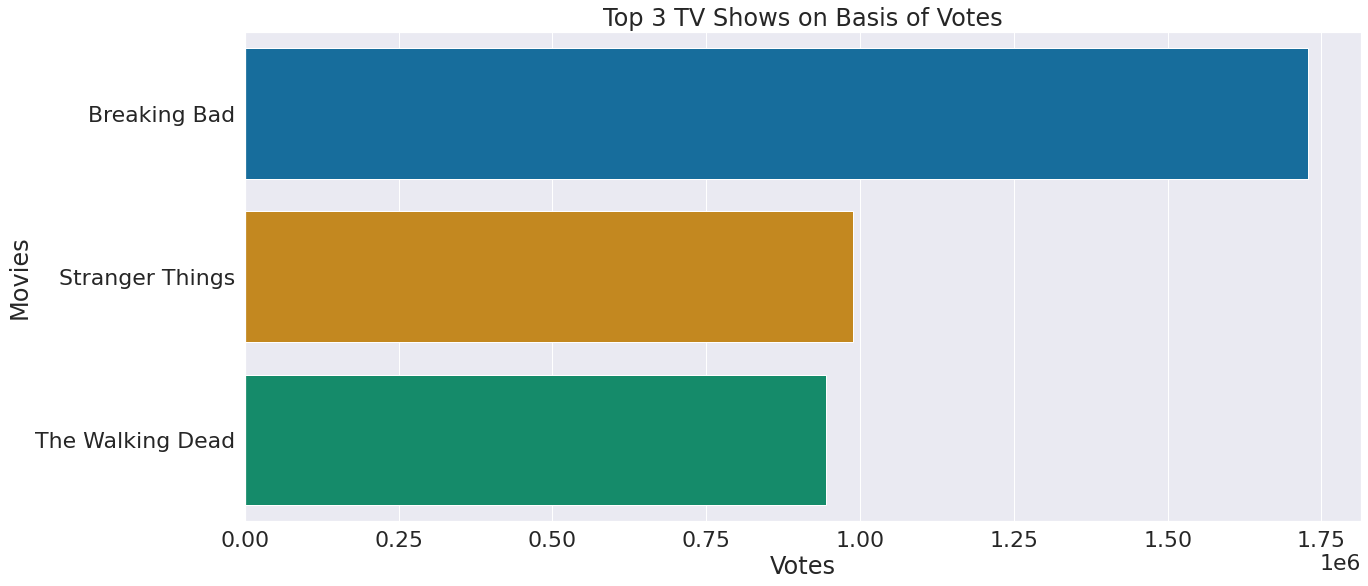

In [40]:
plt.figure(figsize=(20,9))
sns.set(font_scale = 2)
sns.barplot(x ="TOTAL_VOTES" , y ="TITLE", data = votes_shows,orient ='h',palette = "colorblind")
plt.title("Top 3 TV Shows on Basis of Votes")
plt.xlabel("Votes")
plt.ylabel("Movies")

plt.show()

# 6. Summary of Analysis

Following points are summed up to provide an insight into the datasets :

* **Oldest Movie and TV show steaming on the Netflix were released between the Years 1950 and 1970**
* **Documentary named "David Attenborough: A Life on Our Planet" which was released in the year 2020 has the highest IMDB score of 9**
* **Drama Tv show "Breaking Bad" scored 9.5 on IMDB**
* **US is one of the top players in an entertainment industry as most of the movies and TV shows broadcasted by Netflix are produced by US**
* **Most of the Movies and TV shows steaming on Netflix falls under the category of Drama, thriller and Scifi followed by Comedy**
* **Inception and Forest Gump movies have gained a huge success and received votes of above 19 lakhs**
* **Breaking Bad and Stranger things have snatched popularity by getting massive amount of votes by Netflix users**



# References

**Dataset:**
* https://www.kaggle.com/datasets/thedevastator/the-ultimate-netflix-tv-shows-and-movies-dataset

**Seaborn Tutorial:**
* https://elitedatascience.com/python-seaborn-tutorial
* https://www.geeksforgeeks.org/plotting-graph-using-seaborn-python/
* https://www.geeksforgeeks.org/seaborn-color-palette/
* https://www.codecademy.com/article/seaborn-design-ii
* https://seaborn.pydata.org/tutorial/color_palettes.html
* https://www.geeksforgeeks.org/scatterplot-using-seaborn-in-python/
* https://cherono-mj.medium.com/sns-countplot-order-844b03caef45
* https://towardsdatascience.com/beautifying-the-messy-plots-in-python-solving-common-issues-in-seaborn-7372e6479fb
* https://www.statology.org/seaborn-legend-position/
